In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib

# Import Data and Data Cleaning

In [4]:
housing = fetch_openml(name="house_prices", as_frame=True)
data = housing.frame
data.drop(columns=['Id'], inplace=True)

In [5]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
data.shape

(1460, 80)

In [9]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
columns_with_missing = missing_percentage[missing_percentage > 10]

In [10]:
min(columns_with_missing)

17.73972602739726

In [11]:
columns_with_missing

LotFrontage    17.739726
Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [12]:
data.drop(columns=columns_with_missing[columns_with_missing > 30].index, inplace=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [13]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [15]:
cat_cols = data.select_dtypes(include=["object"]).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

## Outlier data management

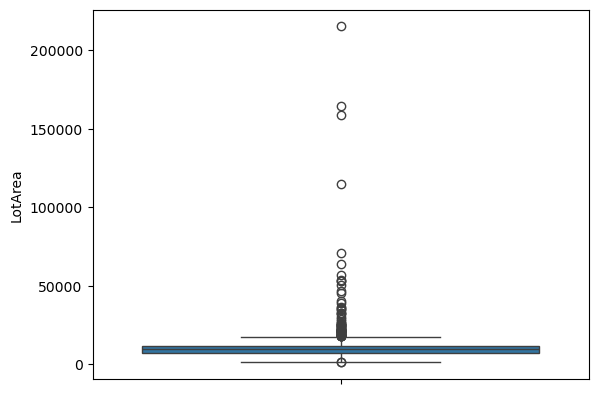

In [17]:
sns.boxplot(data['LotArea'])
plt.show()

In [18]:
Q1 = data['LotArea'].quantile(0.25)
Q3 = data['LotArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
uper_bound = Q3 + 1.5 * IQR
filter_data = data[(data['LotArea'] >= lower_bound) & (data['LotArea'] <= uper_bound)]
filter_data['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1391, dtype: int64

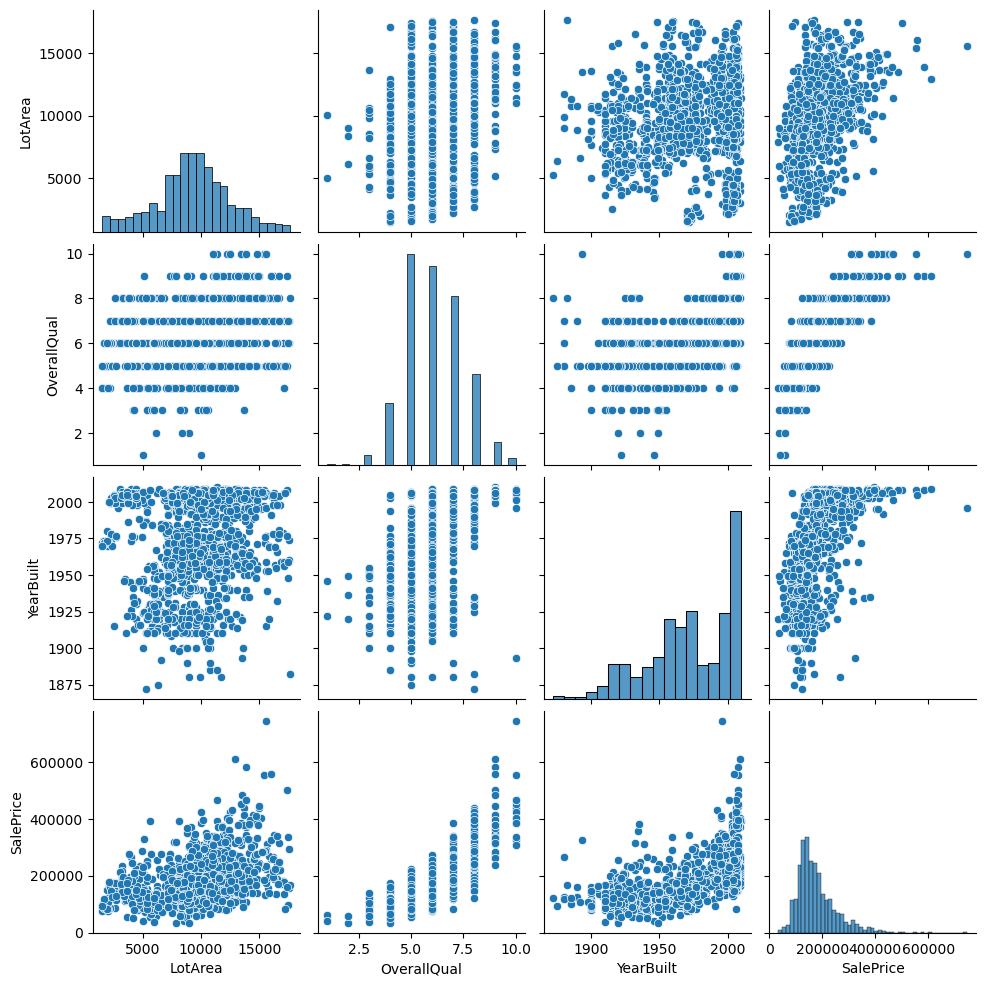

In [19]:
important_features = ['LotArea', 'OverallQual', 'YearBuilt', 'SalePrice']
sns.pairplot(filter_data[important_features])
plt.show()

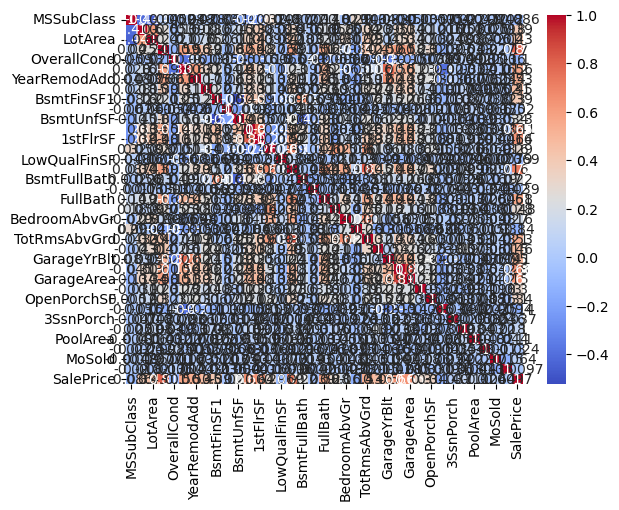

In [20]:
filterNum_cols = filter_data.select_dtypes(include=["int64", "float64"])
corr_matrix = filterNum_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

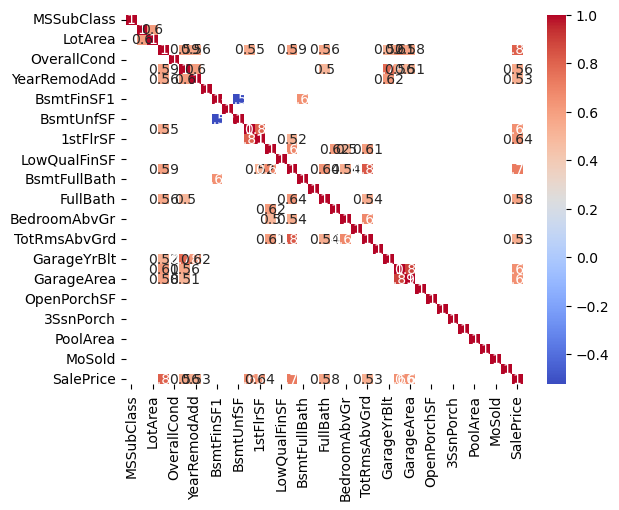

In [21]:
high_corr_features = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]
sns.heatmap(high_corr_features, annot=True, cmap='coolwarm')
plt.show()

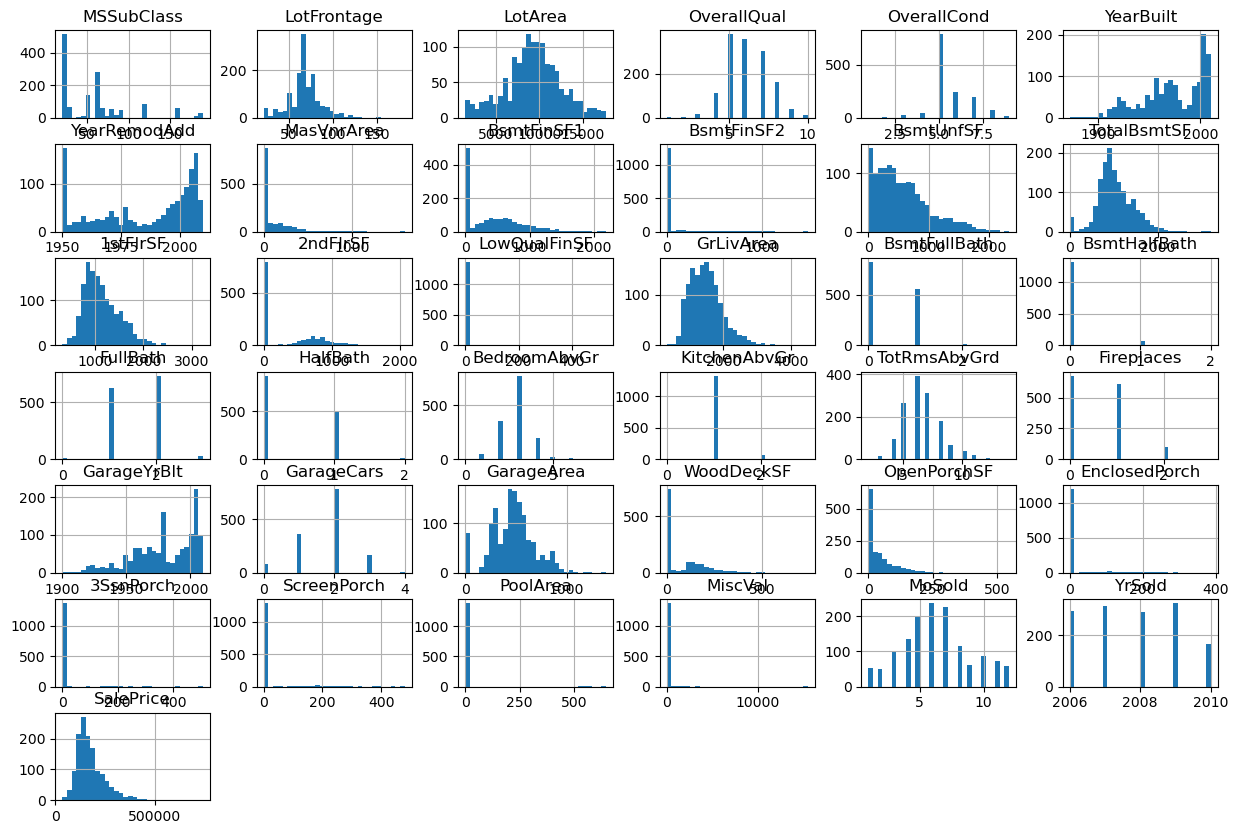

In [22]:
filter_data.hist(bins=30, figsize=(15, 10))
plt.show()

In [23]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1391 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1391 non-null   int64  
 1   MSZoning       1391 non-null   object 
 2   LotFrontage    1391 non-null   float64
 3   LotArea        1391 non-null   int64  
 4   Street         1391 non-null   object 
 5   LotShape       1391 non-null   object 
 6   LandContour    1391 non-null   object 
 7   Utilities      1391 non-null   object 
 8   LotConfig      1391 non-null   object 
 9   LandSlope      1391 non-null   object 
 10  Neighborhood   1391 non-null   object 
 11  Condition1     1391 non-null   object 
 12  Condition2     1391 non-null   object 
 13  BldgType       1391 non-null   object 
 14  HouseStyle     1391 non-null   object 
 15  OverallQual    1391 non-null   int64  
 16  OverallCond    1391 non-null   int64  
 17  YearBuilt      1391 non-null   int64  
 18  YearRemodAdd 

In [24]:
corr_with_target = corr_matrix["SalePrice"].sort_values(ascending=False)
corr_with_target

SalePrice        1.000000
OverallQual      0.807055
GrLivArea        0.723421
GarageCars       0.655316
TotalBsmtSF      0.654944
GarageArea       0.650744
1stFlrSF         0.636585
FullBath         0.576596
YearBuilt        0.563899
TotRmsAbvGrd     0.533876
YearRemodAdd     0.533207
GarageYrBlt      0.499151
Fireplaces       0.463619
MasVnrArea       0.452629
LotArea          0.430442
BsmtFinSF1       0.394201
LotFrontage      0.390738
OpenPorchSF      0.335012
WoodDeckSF       0.300153
2ndFlrSF         0.289583
HalfBath         0.280531
BsmtUnfSF        0.234637
BsmtFullBath     0.222392
BedroomAbvGr     0.159633
PoolArea         0.107485
ScreenPorch      0.100892
MoSold           0.063835
3SsnPorch        0.036792
YrSold          -0.009695
BsmtFinSF2      -0.019569
MiscVal         -0.024334
BsmtHalfBath    -0.039378
LowQualFinSF    -0.068969
MSSubClass      -0.085578
OverallCond     -0.103479
EnclosedPorch   -0.139654
KitchenAbvGr    -0.140831
Name: SalePrice, dtype: float64

In [25]:
le = LabelEncoder()
filter_data.loc[:, 'Street'] = le.fit_transform(filter_data['Street']).astype('int32')
filter_data.loc[:, 'LotShape'] = le.fit_transform(filter_data['LotShape']).astype('int32')
filter_data.loc[:, 'LandSlope'] = le.fit_transform(filter_data['LandSlope']).astype('int32')
filter_data.loc[:, 'ExterQual'] = le.fit_transform(filter_data['ExterQual']).astype('int32')
filter_data.loc[:, 'ExterCond'] = le.fit_transform(filter_data['ExterCond']).astype('int32')
filter_data.loc[:, 'BsmtCond'] = le.fit_transform(filter_data['BsmtCond']).astype('int32')
filter_data.loc[:, 'BsmtQual'] = le.fit_transform(filter_data['BsmtQual']).astype('int32')
filter_data.loc[:, 'HeatingQC'] = le.fit_transform(filter_data['HeatingQC']).astype('int32')
filter_data.loc[:, 'KitchenQual'] = le.fit_transform(filter_data['KitchenQual']).astype('int32')
filter_data.loc[:, 'Functional'] = le.fit_transform(filter_data['Functional']).astype('int32')
filter_data.loc[:, 'GarageQual'] = le.fit_transform(filter_data['GarageQual']).astype('int32')
filter_data.loc[:, 'GarageCond'] = le.fit_transform(filter_data['GarageCond']).astype('int32')
filter_data.loc[:, 'PavedDrive'] = le.fit_transform(filter_data['PavedDrive']).astype('int32')
filter_data.loc[:, 'Fireplaces'] = le.fit_transform(filter_data['Fireplaces']).astype('int32')
filter_data.loc[:, 'CentralAir'] = le.fit_transform(filter_data['CentralAir']).astype('int32')

In [26]:
filter_data = pd.get_dummies(filter_data, columns=['MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                                                  'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                                                  'Foundation', 'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'])

In [27]:
filter_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,...,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,56.962617,68.856219,9272.537024,6.091301,5.577283,1971.557872,1984.989216,100.303379,430.020848,43.389648,...,90.616104,45.171819,21.656362,3.025162,14.442847,1.652049,38.414091,6.328541,2007.824587,178136.292595
std,42.321925,19.052280,3196.732418,1.371709,1.105071,30.301757,20.676905,173.040603,425.617348,153.444567,...,119.725354,63.498462,59.418996,28.078950,54.195152,30.877684,456.669597,2.694099,1.325782,75793.167741
min,20.000000,21.000000,1491.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7429.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,50.000000,69.000000,9286.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,378.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,78.000000,11231.500000,7.000000,6.000000,2001.000000,2004.000000,163.500000,698.500000,0.000000,...,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,210000.000000
max,190.000000,182.000000,17671.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,736.000000,547.000000,386.000000,508.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


In [28]:
scaler = StandardScaler()
filter_data[filterNum_cols.columns] = scaler.fit_transform(filter_data[filterNum_cols.columns])

In [29]:
filter_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,...,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03
mean,-4.980440e-17,1.481362e-16,-2.419983e-16,2.988264e-16,-8.173029e-17,3.113413e-15,-3.368821e-15,-1.021629e-17,-5.874365e-17,2.043257e-17,...,4.341922e-17,1.053555e-17,-6.385179e-17,4.086515e-17,-2.809479e-17,-1.021629e-17,-2.043257e-17,9.194658e-17,-7.895146e-14,-7.534511e-17
std,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,...,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00
min,-8.736821e-01,-2.512740e+00,-2.435091e+00,-3.712983e+00,-4.143562e+00,-3.286729e+00,-1.692797e+00,-5.798607e-01,-1.010710e+00,-2.828725e-01,...,-7.571387e-01,-7.116403e-01,-3.645997e-01,-1.077765e-01,-2.665929e-01,-5.352225e-02,-8.414816e-02,-1.978567e+00,-1.376730e+00,-1.890511e+00
25%,-8.736821e-01,-4.650049e-01,-5.769016e-01,-7.958638e-01,-5.225821e-01,-5.796425e-01,-8.703278e-01,-5.798607e-01,-1.010710e+00,-2.828725e-01,...,-7.571387e-01,-7.116403e-01,-3.645997e-01,-1.077765e-01,-2.665929e-01,-5.352225e-02,-8.414816e-02,-4.933072e-01,-6.221863e-01,-6.485276e-01
50%,-1.645748e-01,7.549394e-03,4.212995e-03,-6.658413e-02,-5.225821e-01,8.062260e-02,4.359465e-01,-5.798607e-01,-1.222684e-01,-2.828725e-01,...,-7.571387e-01,-3.335425e-01,-3.645997e-01,-1.077765e-01,-2.665929e-01,-5.352225e-02,-8.414816e-02,-1.219921e-01,1.323570e-01,-2.393727e-01
75%,3.081635e-01,4.801037e-01,6.130221e-01,6.626956e-01,3.826628e-01,9.719805e-01,9.197518e-01,3.653440e-01,6.310262e-01,-2.828725e-01,...,6.465776e-01,3.281288e-01,-3.645997e-01,-1.077765e-01,-2.665929e-01,-5.352225e-02,-8.414816e-02,6.206381e-01,8.869002e-01,4.205546e-01
max,3.144593e+00,5.940731e+00,2.628147e+00,2.850535e+00,3.098397e+00,1.269100e+00,1.210035e+00,8.669849e+00,4.131907e+00,9.326657e+00,...,5.392475e+00,7.905840e+00,6.133976e+00,1.799057e+01,8.593473e+00,2.094006e+01,3.386945e+01,2.105898e+00,1.641443e+00,7.481777e+00


In [30]:
filter_data.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,OverallQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.071794,-0.202475,-0.257398,1,3,Lvl,AllPub,Inside,0,0.662696,...,False,False,False,True,False,False,False,False,True,False
1,-0.873682,0.585116,0.102474,1,3,Lvl,AllPub,FR2,0,-0.066584,...,False,False,False,True,False,False,False,False,True,False
2,0.071794,-0.044957,0.618811,1,0,Lvl,AllPub,Inside,0,0.662696,...,False,False,False,True,False,False,False,False,True,False
3,0.308163,-0.465005,0.086827,1,0,Lvl,AllPub,Corner,0,0.662696,...,False,False,False,True,True,False,False,False,False,False
4,0.071794,0.795140,1.560736,1,0,Lvl,AllPub,FR2,0,1.391975,...,False,False,False,True,False,False,False,False,True,False


In [31]:
for col in ['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive']:
    filter_data[col] = le.fit_transform(filter_data[col].astype(str))

In [32]:
obj_cols = filter_data.select_dtypes(include='object').columns
obj_cols

Index([], dtype='object')

In [33]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1391 entries, 0 to 1459
Columns: 197 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(138), float64(37), int32(22)
memory usage: 720.0 KB


# Machine learning

In [35]:
X = filter_data.drop('SalePrice', axis=1)
y = filter_data['SalePrice']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [38]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)

Linear Regression MSE: 1.5982893115931104e+17


## Random Forest

In [40]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)

Random Forest MSE: 0.10435033380950316


## Gradient Boosting

In [42]:
gb_regressor = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    loss='squared_error',
    random_state=42
)
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting MSE:", mse_gb)

Gradient Boosting MSE: 0.07684200925768693


### Save model

In [85]:
# joblib.dump(gb_regressor, 'gradient_boosting_model.pkl')

### Residual Plot

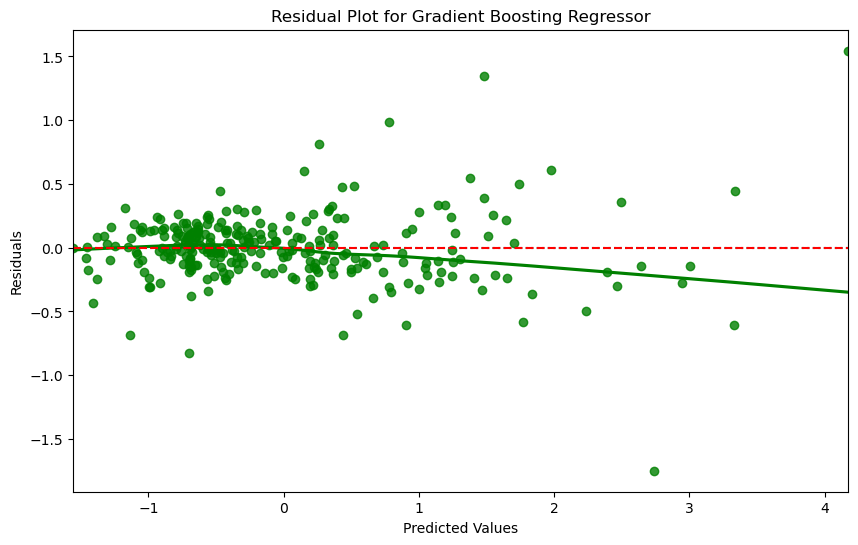

In [46]:
residuals = y_test - y_pred_gb

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_gb, y=residuals, lowess=True, color="g")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Gradient Boosting Regressor')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()